In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Import Spotify Credentials
from config import CLIENT_ID
from config import CLIENT_SECRET

In [2]:
# Authenticate Spotify credentials and connect to Spotify API with Spotipy library
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Retrieve audio features for a specific track
track_id = '1BxfuPKGuaTgP7aM0Bbdwr'
audio_features = sp.audio_features([track_id])

# Print audio features
print(json.dumps(audio_features, indent=4, sort_keys=True))

[
    {
        "acousticness": 0.117,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/1BxfuPKGuaTgP7aM0Bbdwr",
        "danceability": 0.552,
        "duration_ms": 178427,
        "energy": 0.702,
        "id": "1BxfuPKGuaTgP7aM0Bbdwr",
        "instrumentalness": 2.06e-05,
        "key": 9,
        "liveness": 0.105,
        "loudness": -5.707,
        "mode": 1,
        "speechiness": 0.157,
        "tempo": 169.994,
        "time_signature": 4,
        "track_href": "https://api.spotify.com/v1/tracks/1BxfuPKGuaTgP7aM0Bbdwr",
        "type": "audio_features",
        "uri": "spotify:track:1BxfuPKGuaTgP7aM0Bbdwr",
        "valence": 0.564
    }
]


In [3]:
# Taylor Swift

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
swift_track_uri=[]
swift_track_name= []
swift_track_pop=[]
swift_artist_name=[]

# Create artist variable using unique URI ID 
swift_uri='spotify:artist:06HL4z0CvFAxyc27GXpf02'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
swift_results = sp.artist_top_tracks(swift_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in swift_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    swift_track_uri.append(track['uri'])
    swift_track_name.append(track['name'])
    swift_track_pop.append(track['popularity'])
    swift_artist_name.append(track['artists'][0]['name'])   

# Retrieve audio features from artist's top tracks
swiftdata=sp.audio_features(tracks=swift_track_uri)

# Slicing indexes so they are the same length as other audio features
swift_track_name = swift_track_name[0:9]
swift_track_pop= swift_track_pop[0:9]
swift_artist_name = swift_artist_name[0:9]

# Create empty lists to populate values 
swift_tracks_acousticness=[]
swift_tracks_tempo=[]
swift_tracks_uri=[]
swift_tracks_energy=[]
swift_tracks_loudness=[]
swift_tracks_speechiness=[]
swift_tracks_danceability=[]
swift_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for swift in range(len(swiftdata)-1):
# Append values to empty lists above   
    swift_tracks_acousticness.append(swiftdata[swift]['acousticness'])
    swift_tracks_tempo.append(swiftdata[swift]['tempo'])
    swift_tracks_uri.append(swiftdata[swift]['uri'])
    swift_tracks_energy.append(swiftdata[swift]['energy'])
    swift_tracks_loudness.append(swiftdata[swift]['loudness'])
    swift_tracks_speechiness.append(swiftdata[swift]['speechiness'])
    swift_tracks_danceability.append(swiftdata[swift]['danceability'])
    swift_tracks_valence.append(swiftdata[swift]['valence'])

# Create DataFrame displaying values for each audio feature column
swiftdata_df=pd.DataFrame({
    'uri':swift_tracks_uri,
    'artist': swift_artist_name, 
    'track':swift_track_name,
    'acousticness':swift_tracks_acousticness,
    'tempo': swift_tracks_tempo,
    'energy':swift_tracks_energy,
    'loudness': swift_tracks_loudness,
    'speechiness':swift_tracks_speechiness,
    'danceability':swift_tracks_danceability,
    'popularity': swift_track_pop,
    'valence': swift_tracks_valence
    })
print(swiftdata_df)

Cruel Summer Taylor Swift
spotify:track:1BxfuPKGuaTgP7aM0Bbdwr
Is It Over Now? (Taylor's Version) (From The Vault) Taylor Swift
spotify:track:1Iq8oo9XkmmvCQiGOfORiz
Anti-Hero Taylor Swift
spotify:track:0V3wPSX9ygBnCm8psDIegu
Lover Taylor Swift
spotify:track:1dGr1c8CrMLDpV6mPbImSI
You’re Losing Me (From The Vault) Taylor Swift
spotify:track:3CWq0pAKKTWb0K4yiglDc4
cardigan Taylor Swift
spotify:track:4R2kfaDFhslZEMJqAFNpdd
Don’t Blame Me Taylor Swift
spotify:track:1R0a2iXumgCiFb7HEZ7gUE
august Taylor Swift
spotify:track:3hUxzQpSfdDqwM3ZTFQY0K
Now That We Don't Talk (Taylor's Version) (From The Vault) Taylor Swift
spotify:track:5KD6AEm19QnMbfWpfoOHMl
"Slut!" (Taylor's Version) (From The Vault) Taylor Swift
spotify:track:71BqAINEnezjQfxE4VuJfq
                                    uri        artist  \
0  spotify:track:1BxfuPKGuaTgP7aM0Bbdwr  Taylor Swift   
1  spotify:track:1Iq8oo9XkmmvCQiGOfORiz  Taylor Swift   
2  spotify:track:0V3wPSX9ygBnCm8psDIegu  Taylor Swift   
3  spotify:track:1dGr1c

In [4]:
# Drake

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
drake_tracks_uri=[]
drake_tracks_name= []
drake_track_pop=[]
drake_artist_name=[]

# Create artist variable using unique URI ID 
drake_uri='spotify:artist:3TVXtAsR1Inumwj472S9r4'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
drake_results = sp.artist_top_tracks(drake_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in drake_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    drake_tracks_uri.append(track['uri'])
    drake_tracks_name.append(track['name'])
    drake_track_pop.append(track['popularity'])
    drake_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
drakedata=sp.audio_features(tracks=drake_tracks_uri)

# Slicing indexes so they are the same length as other audio features
drake_tracks_name = drake_tracks_name[0:9]
drake_track_pop= drake_track_pop[0:9]
drake_artist_name = drake_artist_name[0:9]

# Create empty lists to populate values 
drake_tracks_acousticness=[]
drake_tracks_tempo=[]
drake_tracks_uri=[]
drake_tracks_energy=[]
drake_tracks_loudness=[]
drake_tracks_speechiness=[]
drake_tracks_danceability=[]
drake_tracks_valence=[]
# Create for-loop to iterate over each track and its audio features
for drake in range(len(drakedata)-1):
# Append values to empty lists above   
    drake_tracks_acousticness.append(drakedata[drake]['acousticness'])
    drake_tracks_tempo.append(drakedata[drake]['tempo'])
    drake_tracks_uri.append(drakedata[drake]['uri'])
    drake_tracks_energy.append(drakedata[drake]['energy'])
    drake_tracks_loudness.append(drakedata[drake]['loudness'])
    drake_tracks_speechiness.append(drakedata[drake]['speechiness'])
    drake_tracks_danceability.append(drakedata[drake]['danceability'])
    drake_tracks_valence.append(drakedata[drake]['valence'])

# Create DataFrame displaying values for each audio feature column
drakedata_df=pd.DataFrame({
    'uri':drake_tracks_uri,
    'artist': drake_artist_name, 
    'track':drake_tracks_name,
    'acousticness':drake_tracks_acousticness,
    'tempo': drake_tracks_tempo,
    'energy':drake_tracks_energy,
    'loudness': drake_tracks_loudness,
    'speechiness':drake_tracks_speechiness,
    'danceability':drake_tracks_danceability,
    'popularity': drake_track_pop,
    'valence': drake_tracks_valence
    })
print(drakedata_df)

IDGAF (feat. Yeat) Drake
spotify:track:2YSzYUF3jWqb9YP9VXmpjE
Rich Baby Daddy (feat. Sexyy Red & SZA) Drake
spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
First Person Shooter (feat. J. Cole) Drake
spotify:track:7aqfrAY2p9BUSiupwk3svU
One Dance Drake
spotify:track:1zi7xx7UVEFkmKfv06H8x0
Jimmy Cooks (feat. 21 Savage) Drake
spotify:track:3F5CgOj3wFlRv51JsHbxhe
God's Plan Drake
spotify:track:6DCZcSspjsKoFjzjrWoCdn
MELTDOWN (feat. Drake) Travis Scott
spotify:track:67nepsnrcZkowTxMWigSbb
Passionfruit Drake
spotify:track:5mCPDVBb16L4XQwDdbRUpz
Rich Flex Drake
spotify:track:1bDbXMyjaUIooNwFE9wn0N
Needle (feat. Drake) Nicki Minaj
spotify:track:4I4G0LD277PWvfblYtSf91
                                    uri        artist  \
0  spotify:track:2YSzYUF3jWqb9YP9VXmpjE         Drake   
1  spotify:track:1yeB8MUNeLo9Ek1UEpsyz6         Drake   
2  spotify:track:7aqfrAY2p9BUSiupwk3svU         Drake   
3  spotify:track:1zi7xx7UVEFkmKfv06H8x0         Drake   
4  spotify:track:3F5CgOj3wFlRv51JsHbxhe         Drake   
5

In [5]:
# Travis Scott

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
trav_tracks_uri=[]
trav_tracks_name= []
trav_track_pop=[]
trav_artist_name=[]

# Create artist variable using unique URI ID 
trav_uri='spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
trav_results = sp.artist_top_tracks(trav_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in trav_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    trav_tracks_uri.append(track['uri'])
    trav_tracks_name.append(track['name'])
    trav_track_pop.append(track['popularity'])
    trav_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
travdata=sp.audio_features(tracks=trav_tracks_uri)

# Slicing indexes so they are the same length as other audio features
trav_tracks_name = trav_tracks_name[0:9]
trav_track_pop= trav_track_pop[0:9]
trav_artist_name = trav_artist_name[0:9]

# Create empty lists to populate values 
trav_tracks_acousticness=[]
trav_tracks_tempo=[]
trav_tracks_uri=[]
trav_tracks_energy=[]
trav_tracks_loudness=[]
trav_tracks_speechiness=[]
trav_tracks_danceability=[]
trav_tracks_valence=[]
# Create for-loop to iterate over each track and its audio features
for trav in range(len(travdata)-1):
# Append values to empty lists above   
    trav_tracks_acousticness.append(travdata[trav]['acousticness'])
    trav_tracks_tempo.append(travdata[trav]['tempo'])
    trav_tracks_uri.append(travdata[trav]['uri'])
    trav_tracks_energy.append(travdata[trav]['energy'])
    trav_tracks_loudness.append(travdata[trav]['loudness'])
    trav_tracks_speechiness.append(travdata[trav]['speechiness'])
    trav_tracks_danceability.append(travdata[trav]['danceability'])
    trav_tracks_valence.append(travdata[trav]['valence'])

# Create DataFrame displaying values for each audio feature column
travdata_df=pd.DataFrame({
    'uri':trav_tracks_uri,
    'artist': trav_artist_name, 
    'track':trav_tracks_name,
    'acousticness':trav_tracks_acousticness,
    'tempo': trav_tracks_tempo,
    'energy':trav_tracks_energy,
    'loudness': trav_tracks_loudness,
    'speechiness':trav_tracks_speechiness,
    'danceability':trav_tracks_danceability,
    'popularity': trav_track_pop,
    'valence': trav_tracks_valence
    })
print(travdata_df)

Water - Remix Tyla
spotify:track:2Y4ImmYsxc4bclzGlmvlzo
I KNOW ? Travis Scott
spotify:track:6wsqVwoiVH2kde4k4KKAFU
FE!N (feat. Playboi Carti) Travis Scott
spotify:track:42VsgItocQwOQC3XWZ8JNA
MY EYES Travis Scott
spotify:track:4kjI1gwQZRKNDkw1nI475M
Trance (with Travis Scott & Young Thug) Metro Boomin
spotify:track:5wG3HvLhF6Y5KTGlK0IW3J
goosebumps Travis Scott
spotify:track:6gBFPUFcJLzWGx4lenP6h2
MELTDOWN (feat. Drake) Travis Scott
spotify:track:67nepsnrcZkowTxMWigSbb
SICKO MODE Travis Scott
spotify:track:2xLMifQCjDGFmkHkpNLD9h
TELEKINESIS (feat. SZA & Future) Travis Scott
spotify:track:1i9lZvlaDdWDPyXEE95aiq
Fair Trade (with Travis Scott) Drake
spotify:track:40iJIUlhi6renaREYGeIDS
                                    uri        artist  \
0  spotify:track:2Y4ImmYsxc4bclzGlmvlzo          Tyla   
1  spotify:track:6wsqVwoiVH2kde4k4KKAFU  Travis Scott   
2  spotify:track:42VsgItocQwOQC3XWZ8JNA  Travis Scott   
3  spotify:track:4kjI1gwQZRKNDkw1nI475M  Travis Scott   
4  spotify:track:5wG3Hv

In [6]:
# Zach Bryan

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
zach_track_uri=[]
zach_track_name= []
zach_track_pop=[]
zach_artist_name=[]

# Create artist variable using unique URI ID 
zach_uri= "spotify:artist:40ZNYROS4zLfyyBSs2PGe2"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
zach_results = sp.artist_top_tracks(zach_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in zach_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    zach_track_uri.append(track['uri'])
    zach_track_name.append(track['name'])
    zach_track_pop.append(track['popularity'])
    zach_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
zachdata=sp.audio_features(tracks=zach_track_uri)

# Slicing indexes so they are the same length as other audio features
zach_track_name = zach_track_name[0:9]
zach_track_pop= zach_track_pop[0:9]
zach_artist_name = zach_artist_name[0:9]

# Create empty lists to populate values 
zach_tracks_acousticness=[]
zach_tracks_tempo=[]
zach_tracks_uri=[]
zach_tracks_energy=[]
zach_tracks_loudness=[]
zach_tracks_speechiness=[]
zach_tracks_danceability=[]
zach_tracks_valence=[]
# Create for-loop to iterate over each track and its audio features
for zach in range(len(zachdata)-1):
# Append values to empty lists above   
    zach_tracks_acousticness.append(zachdata[zach]['acousticness'])
    zach_tracks_tempo.append(zachdata[zach]['tempo'])
    zach_tracks_uri.append(zachdata[zach]['uri'])
    zach_tracks_energy.append(zachdata[zach]['energy'])
    zach_tracks_loudness.append(zachdata[zach]['loudness'])
    zach_tracks_speechiness.append(zachdata[zach]['speechiness'])
    zach_tracks_danceability.append(zachdata[zach]['danceability'])
    zach_tracks_valence.append(zachdata[zach]['valence'])

# Create DataFrame displaying values for each audio feature column
zachdata_df=pd.DataFrame({
    'uri':zach_tracks_uri,
    'artist': zach_artist_name, 
    'track':zach_track_name,
    'acousticness':zach_tracks_acousticness,
    'tempo': zach_tracks_tempo,
    'energy':zach_tracks_energy,
    'loudness': zach_tracks_loudness,
    'speechiness':zach_tracks_speechiness,
    'danceability':zach_tracks_danceability,
    'popularity': zach_track_pop,
    'valence': zach_tracks_valence
    })
print(zachdata_df)

I Remember Everything (feat. Kacey Musgraves) Zach Bryan
spotify:track:4KULAymBBJcPRpk1yO4dOG
Something in the Orange Zach Bryan
spotify:track:3WMj8moIAXJhHsyLaqIIHI
Heading South Zach Bryan
spotify:track:2Dct3GykKZ58hpWRFfe2Qd
Hey Driver (feat. The War and Treaty) Zach Bryan
spotify:track:4pCbJC43j3gSqG6Fen6upD
Dawns (feat. Maggie Rogers) Zach Bryan
spotify:track:42TtHTxWk782ZBiqyOi2d1
Oklahoma Smokeshow Zach Bryan
spotify:track:0OWhKvvsHptt6vnnNUSM9a
Burn, Burn, Burn Zach Bryan
spotify:track:5jfhLCSIFUO4ndzNRh4w4G
Sun to Me Zach Bryan
spotify:track:1SjsVdSXpwm1kTdYEHoPIT
Tourniquet Zach Bryan
spotify:track:3EvZ03hGAFwGZ2Ebcu86YH
Sarah's Place (feat. Noah Kahan) Zach Bryan
spotify:track:1fvC3CmNAbsx0V9ULMU8NB
                                    uri      artist  \
0  spotify:track:4KULAymBBJcPRpk1yO4dOG  Zach Bryan   
1  spotify:track:3WMj8moIAXJhHsyLaqIIHI  Zach Bryan   
2  spotify:track:2Dct3GykKZ58hpWRFfe2Qd  Zach Bryan   
3  spotify:track:4pCbJC43j3gSqG6Fen6upD  Zach Bryan   
4  sp

In [7]:
# Kanye West

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
kanye_tracks_uri=[]
kanye_tracks_name= []
kanye_track_pop=[]
kanye_artist_name=[]

# Create artist variable using unique URI ID 
kanye_uri="spotify:artist:5K4W6rqBFWDnAN6FQUkS6x"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
kanye_results = sp.artist_top_tracks(kanye_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in kanye_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    kanye_tracks_uri.append(track['uri'])
    kanye_tracks_name.append(track['name'])
    kanye_track_pop.append(track['popularity'])
    kanye_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
kanyedata=sp.audio_features(tracks=kanye_tracks_uri)

# Slicing indexes so they are the same length as other audio features
kanye_tracks_name = kanye_tracks_name[0:9]
kanye_track_pop= kanye_track_pop[0:9]
kanye_artist_name = kanye_artist_name[0:9]

# Create empty lists to populate values 
kanye_tracks_acousticness=[]
kanye_tracks_tempo=[]
kanye_tracks_uri=[]
kanye_tracks_energy=[]
kanye_tracks_loudness=[]
kanye_tracks_speechiness=[]
kanye_tracks_danceability=[]
kanye_tracks_valence=[]
# Create for-loop to iterate over each track and its audio features
for kanye in range(len(kanyedata)-1):
# Append values to empty lists above   
    kanye_tracks_acousticness.append(kanyedata[kanye]['acousticness'])
    kanye_tracks_tempo.append(kanyedata[kanye]['tempo'])
    kanye_tracks_uri.append(kanyedata[kanye]['uri'])
    kanye_tracks_energy.append(kanyedata[kanye]['energy'])
    kanye_tracks_loudness.append(kanyedata[kanye]['loudness'])
    kanye_tracks_speechiness.append(kanyedata[kanye]['speechiness'])
    kanye_tracks_danceability.append(kanyedata[kanye]['danceability'])
    kanye_tracks_valence.append(kanyedata[kanye]['valence'])

# Create DataFrame displaying values for each audio feature column
kanyedata_df=pd.DataFrame({
    'uri':kanye_tracks_uri,
    'artist': kanye_artist_name, 
    'track':kanye_tracks_name,
    'acousticness':kanye_tracks_acousticness,
    'tempo': kanye_tracks_tempo,
    'energy':kanye_tracks_energy,
    'loudness': kanye_tracks_loudness,
    'speechiness':kanye_tracks_speechiness,
    'danceability':kanye_tracks_danceability,
    'popularity': kanye_track_pop,
    'valence': kanye_tracks_valence
    })
print(kanyedata_df)

Heartless Kanye West
spotify:track:4EWCNWgDS8707fNSZ1oaA5
Flashing Lights Kanye West
spotify:track:5TRPicyLGbAF2LGBFbHGvO
Father Stretch My Hands Pt. 1 Kanye West
spotify:track:4KW1lqgSr8TKrvBII0Brf8
Runaway Kanye West
spotify:track:3DK6m7It6Pw857FcQftMds
I Wonder Kanye West
spotify:track:7rbECVPkY5UODxoOUVKZnA
Bound 2 Kanye West
spotify:track:3sNVsP50132BTNlImLx70i
Ni**as In Paris JAY-Z
spotify:track:1auxYwYrFRqZP7t3s7w4um
Homecoming Kanye West
spotify:track:4iz9lGMjU1lXS51oPmUmTe
Gold Digger Kanye West
spotify:track:1PS1QMdUqOal0ai3Gt7sDQ
Violent Crimes Kanye West
spotify:track:3s7MCdXyWmwjdcWh7GWXas
                                    uri      artist  \
0  spotify:track:4EWCNWgDS8707fNSZ1oaA5  Kanye West   
1  spotify:track:5TRPicyLGbAF2LGBFbHGvO  Kanye West   
2  spotify:track:4KW1lqgSr8TKrvBII0Brf8  Kanye West   
3  spotify:track:3DK6m7It6Pw857FcQftMds  Kanye West   
4  spotify:track:7rbECVPkY5UODxoOUVKZnA  Kanye West   
5  spotify:track:3sNVsP50132BTNlImLx70i  Kanye West   
6  sp

In [8]:
# The Weeknd

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
wknd_tracks_uri=[]
wknd_tracks_name= []
wknd_track_pop=[]
wknd_artist_name=[]

# Create artist variable using unique URI ID 
wknd_uri="spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
wknd_results = sp.artist_top_tracks(wknd_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in wknd_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    wknd_tracks_uri.append(track['uri'])
    wknd_tracks_name.append(track['name'])
    wknd_track_pop.append(track['popularity'])
    wknd_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
wknddata=sp.audio_features(tracks=wknd_tracks_uri)

# Slicing indexes so they are the same length as other audio features
wknd_tracks_name = wknd_tracks_name[0:9]
wknd_track_pop= wknd_track_pop[0:9]
wknd_artist_name = wknd_artist_name[0:9]

# Create empty lists to populate values 
wknd_tracks_acousticness=[]
wknd_tracks_tempo=[]
wknd_tracks_uri=[]
wknd_tracks_energy=[]
wknd_tracks_loudness=[]
wknd_tracks_speechiness=[]
wknd_tracks_danceability=[]
wknd_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for wknd in range(len(wknddata)-1):
# Append values to empty lists above   
    wknd_tracks_acousticness.append(wknddata[wknd]['acousticness'])
    wknd_tracks_tempo.append(wknddata[wknd]['tempo'])
    wknd_tracks_uri.append(wknddata[wknd]['uri'])
    wknd_tracks_energy.append(wknddata[wknd]['energy'])
    wknd_tracks_loudness.append(wknddata[wknd]['loudness'])
    wknd_tracks_speechiness.append(wknddata[wknd]['speechiness'])
    wknd_tracks_danceability.append(wknddata[wknd]['danceability'])
    wknd_tracks_valence.append(wknddata[wknd]['valence'])

# Create DataFrame displaying values for each audio feature column
wknddata_df=pd.DataFrame({
    'uri':wknd_tracks_uri,
    'artist': wknd_artist_name, 
    'track':wknd_tracks_name,
    'acousticness':wknd_tracks_acousticness,
    'tempo': wknd_tracks_tempo,
    'energy':wknd_tracks_energy,
    'loudness': wknd_tracks_loudness,
    'speechiness':wknd_tracks_speechiness,
    'danceability':wknd_tracks_danceability,
    'popularity': wknd_track_pop,
    'valence': wknd_tracks_valence
    })
print(wknddata_df)

One Of The Girls (with JENNIE, Lily Rose Depp) The Weeknd
spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW
Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series The Weeknd
spotify:track:6WzRpISELf3YglGAh7TXcG
Starboy The Weeknd
spotify:track:7MXVkk9YMctZqd1Srtv4MB
Die For You The Weeknd
spotify:track:2LBqCSwhJGcFQeTHMVGwy3
Blinding Lights The Weeknd
spotify:track:0VjIjW4GlUZAMYd2vXMi3b
Creepin' (with The Weeknd & 21 Savage) Metro Boomin
spotify:track:2dHHgzDwk4BJdRwy9uXhTO
Save Your Tears The Weeknd
spotify:track:5QO79kh1waicV47BqGRL3g
Stargirl Interlude The Weeknd
spotify:track:5gDWsRxpJ2lZAffh5p7K0w
Die For You (with Ariana Grande) - Remix The Weeknd
spotify:track:4W4fNrZYkobj539TOWsLO2
The Hills The Weeknd
spotify:track:7fBv7CLKzipRk6EC6TWHOB
                                    uri        artist  \
0  spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW    The Weeknd   
1  spotify:track:6WzRpISELf3YglGAh7TXcG    The Weeknd   
2  spotify:track:7MXVkk9YMctZqd1Srtv4MB    The Weeknd   
3  spo

In [9]:
# Morgan Wallen

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
wall_tracks_uri=[]
wall_tracks_name= []
wall_track_pop=[]
wall_artist_name=[]

# Create artist variable using unique URI ID 
wall_uri='spotify:artist:4oUHIQIBe0LHzYfvXNW4QM'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
wall_results = sp.artist_top_tracks(wall_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in wall_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    wall_tracks_uri.append(track['uri'])
    wall_tracks_name.append(track['name'])
    wall_track_pop.append(track['popularity'])
    wall_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
walldata=sp.audio_features(tracks=wall_tracks_uri)

# Slicing indexes so they are the same length as other audio features
wall_tracks_name = wall_tracks_name[0:9]
wall_track_pop= wall_track_pop[0:9]
wall_artist_name = wall_artist_name[0:9]

# Create empty lists to populate values 
wall_tracks_acousticness=[]
wall_tracks_tempo=[]
wall_tracks_uri=[]
wall_tracks_energy=[]
wall_tracks_loudness=[]
wall_tracks_speechiness=[]
wall_tracks_danceability=[]
wall_tracks_valence=[]
# Create for-loop to iterate over each track and its audio features
for wall in range(len(walldata)-1):
# Append values to empty lists above   
    wall_tracks_acousticness.append(walldata[wall]['acousticness'])
    wall_tracks_tempo.append(walldata[wall]['tempo'])
    wall_tracks_uri.append(walldata[wall]['uri'])
    wall_tracks_energy.append(walldata[wall]['energy'])
    wall_tracks_loudness.append(walldata[wall]['loudness'])
    wall_tracks_speechiness.append(walldata[wall]['speechiness'])
    wall_tracks_danceability.append(walldata[wall]['danceability'])
    wall_tracks_valence.append(walldata[wall]['valence'])

# Create DataFrame displaying values for each audio feature column
walldata_df=pd.DataFrame({
    'uri':wall_tracks_uri,
    'artist': wall_artist_name, 
    'track':wall_tracks_name,
    'acousticness':wall_tracks_acousticness,
    'tempo': wall_tracks_tempo,
    'energy':wall_tracks_energy,
    'loudness': wall_tracks_loudness,
    'speechiness':wall_tracks_speechiness,
    'danceability':wall_tracks_danceability,
    'popularity': wall_track_pop,
    'valence': wall_tracks_valence
    })
print(walldata_df)

Last Night Morgan Wallen
spotify:track:7K3BhSpAxZBznislvUMVtn
Thinkin’ Bout Me Morgan Wallen
spotify:track:0PAcdVzhPO4gq1Iym9ESnK
You Proof Morgan Wallen
spotify:track:5W4kiM2cUYBJXKRudNyxjW
Wasted On You Morgan Wallen
spotify:track:3cBsEDNhFI9E82vPj3kvi3
Whiskey Glasses Morgan Wallen
spotify:track:6foY66mWZN0pSRjZ408c00
Chasin' You Morgan Wallen
spotify:track:5MwynWK9s4hlyKHqhkNn4A
Cowgirls (feat. ERNEST) Morgan Wallen
spotify:track:7fveJ3pk1eSfxBdVkzdXZ0
Thought You Should Know Morgan Wallen
spotify:track:3Qu3Zh4WTKhP9GEXo0aDnb
Man Made A Bar (feat. Eric Church) Morgan Wallen
spotify:track:73zawW1ttszLRgT9By826D
Heartless (feat. Morgan Wallen) Diplo
spotify:track:3FU6urUVsgXa6RBuV2PdRk
                                    uri         artist  \
0  spotify:track:7K3BhSpAxZBznislvUMVtn  Morgan Wallen   
1  spotify:track:0PAcdVzhPO4gq1Iym9ESnK  Morgan Wallen   
2  spotify:track:5W4kiM2cUYBJXKRudNyxjW  Morgan Wallen   
3  spotify:track:3cBsEDNhFI9E82vPj3kvi3  Morgan Wallen   
4  spotify:tr

In [10]:
# 21 Savage

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
sav_tracks_uri=[]
sav_tracks_name= []
sav_track_pop=[]
sav_artist_name=[]

# Create artist variable using unique URI ID 
sav_uri='spotify:artist:1URnnhqYAYcrqrcwql10ft'

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
sav_results = sp.artist_top_tracks(sav_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in sav_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    sav_tracks_uri.append(track['uri'])
    sav_tracks_name.append(track['name'])
    sav_track_pop.append(track['popularity'])
    sav_artist_name.append(track['artists'][0]['name'])  

# Retrieve audio features from artist's top tracks
savdata=sp.audio_features(tracks=sav_tracks_uri)

# Slicing indexes so they are the same length as other audio features
sav_tracks_name = sav_tracks_name[0:9]
sav_track_pop= sav_track_pop[0:9]
sav_artist_name = sav_artist_name[0:9]

# Create empty lists to populate values 
sav_tracks_acousticness=[]
sav_tracks_tempo=[]
sav_tracks_uri=[]
sav_tracks_energy=[]
sav_tracks_loudness=[]
sav_tracks_speechiness=[]
sav_tracks_danceability=[]
sav_tracks_valence=[]
# Create for-loop to iterate over each track and its audio features
for sav in range(len(savdata)-1):
# Append values to empty lists above   
    sav_tracks_acousticness.append(savdata[sav]['acousticness'])
    sav_tracks_tempo.append(savdata[sav]['tempo'])
    sav_tracks_uri.append(savdata[sav]['uri'])
    sav_tracks_energy.append(savdata[sav]['energy'])
    sav_tracks_loudness.append(savdata[sav]['loudness'])
    sav_tracks_speechiness.append(savdata[sav]['speechiness'])
    sav_tracks_danceability.append(savdata[sav]['danceability'])
    sav_tracks_valence.append(savdata[sav]['valence'])

# Create DataFrame displaying values for each audio feature column
savdata_df=pd.DataFrame({
    'uri':sav_tracks_uri,
    'artist': sav_artist_name, 
    'track':sav_tracks_name,
    'acousticness':sav_tracks_acousticness,
    'tempo': sav_tracks_tempo,
    'energy':sav_tracks_energy,
    'loudness': sav_tracks_loudness,
    'speechiness':sav_tracks_speechiness,
    'danceability':sav_tracks_danceability,
    'popularity': sav_track_pop,
    'valence': sav_tracks_valence
    })
print(savdata_df)

Creepin' (with The Weeknd & 21 Savage) Metro Boomin
spotify:track:2dHHgzDwk4BJdRwy9uXhTO
Jimmy Cooks (feat. 21 Savage) Drake
spotify:track:3F5CgOj3wFlRv51JsHbxhe
Glock In My Lap 21 Savage
spotify:track:6pcywuOeGGWeOQzdUyti6k
Rich Flex Drake
spotify:track:1bDbXMyjaUIooNwFE9wn0N
redrum 21 Savage
spotify:track:52eIcoLUM25zbQupAZYoFh
née-nah 21 Savage
spotify:track:2yUzr8Sr6ldG8vmHhZwTnz
ball w/o you 21 Savage
spotify:track:50a8bKqlwDEqeiEknrzkTO
n.h.i.e. 21 Savage
spotify:track:6x9pCndnXEoea0CMcfjs9W
Runnin 21 Savage
spotify:track:5SWnsxjhdcEDc7LJjq9UHk
Rich Nigga Shit (feat. Young Thug) 21 Savage
spotify:track:3ruoIF2UnoXdzK8mR61ebq
                                    uri        artist  \
0  spotify:track:2dHHgzDwk4BJdRwy9uXhTO  Metro Boomin   
1  spotify:track:3F5CgOj3wFlRv51JsHbxhe         Drake   
2  spotify:track:6pcywuOeGGWeOQzdUyti6k     21 Savage   
3  spotify:track:1bDbXMyjaUIooNwFE9wn0N         Drake   
4  spotify:track:52eIcoLUM25zbQupAZYoFh     21 Savage   
5  spotify:track:2y

In [11]:
# Bad Bunny

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
bad_tracks_uri=[]
bad_tracks_name= []
bad_track_pop=[]
bad_artist_name=[]

# Create artist variable using unique URI ID 
bad_uri="spotify:artist:4q3ewBCX7sLwd24euuV69X"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
bad_results = sp.artist_top_tracks(bad_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in bad_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    bad_tracks_uri.append(track['uri'])
    bad_tracks_name.append(track['name'])
    bad_track_pop.append(track['popularity'])
    bad_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
baddata=sp.audio_features(tracks=bad_tracks_uri)

# Slicing indexes so they are the same length as other audio features
bad_tracks_name = bad_tracks_name[0:9]
bad_track_pop= bad_track_pop[0:9]
bad_artist_name = bad_artist_name[0:9]

# Create empty lists to populate values 
bad_tracks_acousticness=[]
bad_tracks_tempo=[]
bad_tracks_uri=[]
bad_tracks_energy=[]
bad_tracks_loudness=[]
bad_tracks_speechiness=[]
bad_tracks_danceability=[]
bad_tracks_valence=[]
# Create for-loop to iterate over each track and its audio features
for bad in range(len(baddata)-1):
# Append values to empty lists above   
    bad_tracks_acousticness.append(baddata[bad]['acousticness'])
    bad_tracks_tempo.append(baddata[bad]['tempo'])
    bad_tracks_uri.append(baddata[bad]['uri'])
    bad_tracks_energy.append(baddata[bad]['energy'])
    bad_tracks_loudness.append(baddata[bad]['loudness'])
    bad_tracks_speechiness.append(baddata[bad]['speechiness'])
    bad_tracks_danceability.append(baddata[bad]['danceability'])
    bad_tracks_valence.append(baddata[bad]['valence'])

# Create DataFrame displaying values for each audio feature column
baddata_df=pd.DataFrame({
    'uri':bad_tracks_uri,
    'artist': bad_artist_name, 
    'track':bad_tracks_name,
    'acousticness':bad_tracks_acousticness,
    'tempo': bad_tracks_tempo,
    'energy':bad_tracks_energy,
    'loudness': bad_tracks_loudness,
    'speechiness':bad_tracks_speechiness,
    'danceability':bad_tracks_danceability,
    'popularity': bad_track_pop,
    'valence': bad_tracks_valence
    })
print(baddata_df)

PERRO NEGRO Bad Bunny
spotify:track:7iQXYTyuG13aoeHxGG28Nh
MONACO Bad Bunny
spotify:track:4MjDJD8cW7iVeWInc2Bdyj
un x100to Grupo Frontera
spotify:track:2yzshFeBIwH8tWIqHEFLeD
Me Porto Bonito Bad Bunny
spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
WHERE SHE GOES Bad Bunny
spotify:track:2sTDlCxmuZCTDKKk9f1qus
FINA Bad Bunny
spotify:track:3nNmRE0DxHC6ZaKkrpUumS
UN PREVIEW Bad Bunny
spotify:track:5ixdmTpCmH5diBA1j154wN
Ojitos Lindos Bad Bunny
spotify:track:3k3NWokhRRkEPhCzPmV8TW
Tití Me Preguntó Bad Bunny
spotify:track:1IHWl5LamUGEuP4ozKQSXZ
LA CANCIÓN J Balvin
spotify:track:0fea68AdmYNygeTGI4RC18
                                    uri          artist             track  \
0  spotify:track:7iQXYTyuG13aoeHxGG28Nh       Bad Bunny       PERRO NEGRO   
1  spotify:track:4MjDJD8cW7iVeWInc2Bdyj       Bad Bunny            MONACO   
2  spotify:track:2yzshFeBIwH8tWIqHEFLeD  Grupo Frontera         un x100to   
3  spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx       Bad Bunny   Me Porto Bonito   
4  spotify:track:2sTDlC

In [12]:
# Future

# Authenticate and connect to Spotify API through Spotipy library
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET))

# Create empty lists to populate values 
fut_tracks_uri=[]
fut_tracks_name= []
fut_track_pop=[]
fut_artist_name=[]

# Create artist variable using unique URI ID 
fut_uri="spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"

# Use "artist_top_tracks" response from Spotipy Python library to obtain artist's top tracks
fut_results = sp.artist_top_tracks(fut_uri, country='US')

# Create for-loop to iterate over each element in artist's top tracks list
for track in fut_results['tracks']:
    print (track['name'], track['artists'][0]['name'])
    print (track['uri'])
# Append elements to empty lists above    
    fut_tracks_uri.append(track['uri'])
    fut_tracks_name.append(track['name'])
    fut_track_pop.append(track['popularity'])
    fut_artist_name.append(track['artists'][0]['name'])

# Retrieve audio features from artist's top tracks
futdata=sp.audio_features(tracks=fut_tracks_uri)

# Slicing indexes so they are the same length as other audio features
fut_tracks_name = fut_tracks_name[0:9]
fut_track_pop= fut_track_pop[0:9]
fut_artist_name = fut_artist_name[0:9]

# Create empty lists to populate values 
fut_tracks_acousticness=[]
fut_tracks_tempo=[]
fut_tracks_uri=[]
fut_tracks_energy=[]
fut_tracks_loudness=[]
fut_tracks_speechiness=[]
fut_tracks_danceability=[]
fut_tracks_valence=[]

# Create for-loop to iterate over each track and its audio features
for fut in range(len(futdata)-1):
# Append values to empty lists above   
    fut_tracks_acousticness.append(futdata[fut]['acousticness'])
    fut_tracks_tempo.append(futdata[fut]['tempo'])
    fut_tracks_uri.append(futdata[fut]['uri'])
    fut_tracks_energy.append(futdata[fut]['energy'])
    fut_tracks_loudness.append(futdata[fut]['loudness'])
    fut_tracks_speechiness.append(futdata[fut]['speechiness'])
    fut_tracks_danceability.append(futdata[fut]['danceability'])
    fut_tracks_valence.append(futdata[fut]['valence'])

# Create DataFrame displaying values for each audio feature column
futdata_df=pd.DataFrame({
    'uri':fut_tracks_uri,
    'artist': fut_artist_name, 
    'track':fut_tracks_name,
    'acousticness':fut_tracks_acousticness,
    'tempo': fut_tracks_tempo,
    'energy':fut_tracks_energy,
    'loudness': fut_tracks_loudness,
    'speechiness':fut_tracks_speechiness,
    'danceability':fut_tracks_danceability,
    'popularity': fut_track_pop,
    'valence': fut_tracks_valence
    })
print(futdata_df)

Too Many Nights (feat. Don Toliver & with Future) Metro Boomin
spotify:track:2Hh3ETdQKrmSI3QS0hme7g
Superhero (Heroes & Villains) [with Future & Chris Brown] Metro Boomin
spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j
TELEKINESIS (feat. SZA & Future) Travis Scott
spotify:track:1i9lZvlaDdWDPyXEE95aiq
WAIT FOR U (feat. Drake & Tems) Future
spotify:track:59nOXPmaKlBfGMDeOVGrIK
Low Life (feat. The Weeknd) Future
spotify:track:7EiZI6JVHllARrX9PUvAdX
Solo Future
spotify:track:4lH6nENd1y81jp7Yt9lTBX
Mask Off Future
spotify:track:0VgkVdmE4gld66l8iyGjgx
PUFFIN ON ZOOTIEZ Future
spotify:track:1qMMYpVatbRITKCfq1gasi
Life Is Good (feat. Drake) Future
spotify:track:1K5KBOgreBi5fkEHvg5ap3
Private Landing (feat. Justin Bieber & Future) Don Toliver
spotify:track:52NGJPcLUzQq5w7uv4e5gf
                                    uri        artist  \
0  spotify:track:2Hh3ETdQKrmSI3QS0hme7g  Metro Boomin   
1  spotify:track:0vjeOZ3Ft5jvAi9SBFJm1j  Metro Boomin   
2  spotify:track:1i9lZvlaDdWDPyXEE95aiq  Travis Scott   
3 

In [13]:
dfs=[swiftdata_df,drakedata_df,travdata_df,zachdata_df,kanyedata_df,wknddata_df,walldata_df,savdata_df,baddata_df,futdata_df]
merged_df = dfs[0]
common_columns = ['uri','artist','track','acousticness','tempo','energy','loudness','speechiness','danceability','popularity','valence']
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, how='outer',on=common_columns)
print(merged_df)
merged_df.describe()

                                     uri        artist  \
0   spotify:track:1BxfuPKGuaTgP7aM0Bbdwr  Taylor Swift   
1   spotify:track:1Iq8oo9XkmmvCQiGOfORiz  Taylor Swift   
2   spotify:track:0V3wPSX9ygBnCm8psDIegu  Taylor Swift   
3   spotify:track:1dGr1c8CrMLDpV6mPbImSI  Taylor Swift   
4   spotify:track:3CWq0pAKKTWb0K4yiglDc4  Taylor Swift   
..                                   ...           ...   
80  spotify:track:7EiZI6JVHllARrX9PUvAdX        Future   
81  spotify:track:4lH6nENd1y81jp7Yt9lTBX        Future   
82  spotify:track:0VgkVdmE4gld66l8iyGjgx        Future   
83  spotify:track:1qMMYpVatbRITKCfq1gasi        Future   
84  spotify:track:1K5KBOgreBi5fkEHvg5ap3        Future   

                                                track  acousticness    tempo  \
0                                        Cruel Summer        0.1170  169.994   
1   Is It Over Now? (Taylor's Version) (From The V...        0.0504  100.012   
2                                           Anti-Hero        0.

,acousticness,tempo,energy,loudness,speechiness,danceability,popularity,valence
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.220200,121.598388,0.613729,-6.526188,0.116989,0.647741,87.600000,0.373584
std,0.229035,32.617237,0.143118,2.378443,0.113053,0.142213,4.477988,0.185461
min,0.000307,67.033000,0.192000,-14.112000,0.027700,0.359000,70.000000,0.066200
25%,0.050300,94.601000,0.534000,-7.694000,0.039900,0.542000,85.000000,0.216000
50%,0.123000,118.051000,0.640000,-5.983000,0.059800,0.639000,87.000000,0.370000
75%,0.353000,143.961000,0.720000,-5.007000,0.175000,0.784000,91.000000,0.489000
max,0.897000,203.759000,0.882000,-2.248000,0.487000,0.927000,99.000000,0.918000


The correlation between Energy & Popularity is r = 0.011438835294885269


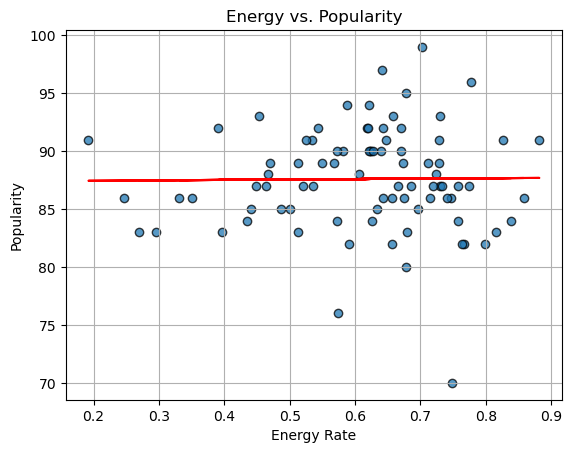

In [14]:
# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
# Linear regression on Tempo vs. Popularity
x = merged_df["energy"]
y = merged_df["popularity"]
title = "Energy"
xlabel= "Energy Rate"
eq_coordinates = [80,75]
figure = "Energy"
RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)

The correlation between Danceability & Popularity is r = -0.06957457435330726


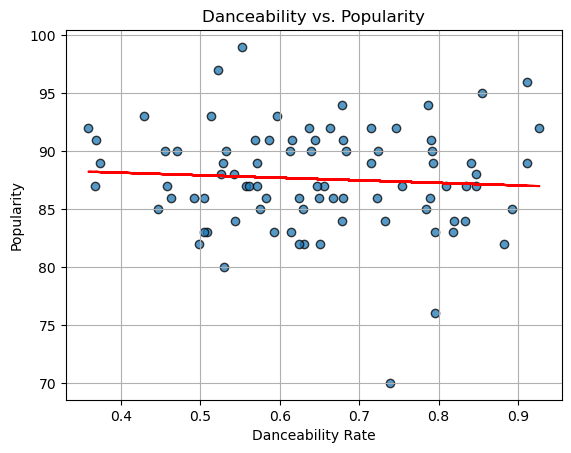

In [15]:
def RegressionPlot(x, y, title, xlabel, eq_coordinates, figure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"{title} vs. Popularity")
    plt.xlabel(xlabel)
    plt.ylabel("Popularity")
    plt.grid(True)
    print(f"The correlation between {title} & Popularity is r = {rvalue}")
    # Save the figure before displaying it
    plt.savefig(f"output_data/Fig_{figure}.png")
    plt.show()
# Linear regression on Tempo vs. Popularity
x = merged_df["danceability"]
y = merged_df["popularity"]
title = "Danceability"
xlabel= "Danceability Rate"
eq_coordinates = [80,75]
figure = "Danceability"
RegressionPlot(x, y, title, xlabel, eq_coordinates, figure)